## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [464]:
raw_datafile = pd.read_csv('1.04. used-car-data.csv')
raw_data = raw_datafile.copy()
raw_data

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW   4200.00      sedan      277     2.00      Petrol   
1     Mercedes-Benz   7900.00        van      427     2.90      Diesel   
2     Mercedes-Benz  13300.00      sedan      358     5.00         Gas   
3              Audi  23000.00  crossover      240     4.20      Petrol   
4            Toyota  18300.00  crossover      120     2.00      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz 125000.00      sedan        9     3.00      Diesel   
4341            BMW   6500.00      sedan        1     3.50      Petrol   
4342            BMW   8000.00      sedan      194     2.00      Petrol   
4343         Toyota  14200.00      sedan       31      nan      Petrol   
4344     Volkswagen  13500.00        van      124     2.00      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
2             yes  2003              S 500  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
...           ...   ...                ...  
4340          yes  2014              S 350  
4341          yes  1999                535  
4342          yes  1985                520  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)   

[4345 rows x 9 columns]

## Preprocessing

### Exploring the descriptive statistics of the variables

In [465]:
raw_data.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4345   4173.00   4345  4345.00  4195.00        4345   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           936       nan   1649      nan      nan        2019   
mean           NaN  19418.75    NaN   161.24     2.79         NaN   
std            NaN  25584.24    NaN   105.71     5.07         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    86.00     1.80         NaN   
50%            NaN  11500.00    NaN   155.00     2.20         NaN   
75%            NaN  21700.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year    Model  
count          4345 4345.00     4345  
unique            2     nan      312  
top             yes     nan  E-Class  
freq           3947     nan      199  
mean            NaN 2006.55      NaN  
std             NaN    6.72      NaN  
min             NaN 1969.00      NaN  
25%             NaN 2003.00      NaN  
50%             NaN 2008.00      NaN  
75%             NaN 2012.00      NaN  
max             NaN 2016.00      NaN

### Determining the variables of interest

In [466]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include = 'all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4345   4173.00   4345  4345.00  4195.00        4345   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           936       nan   1649      nan      nan        2019   
mean           NaN  19418.75    NaN   161.24     2.79         NaN   
std            NaN  25584.24    NaN   105.71     5.07         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    86.00     1.80         NaN   
50%            NaN  11500.00    NaN   155.00     2.20         NaN   
75%            NaN  21700.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year  
count          4345 4345.00  
unique            2     nan  
top             yes     nan  
freq           3947     nan  
mean            NaN 2006.55  
std             NaN    6.72  
min             NaN 1969.00  
25%             NaN 2003.00  
50%             NaN 2008.00  
75%             NaN 2012.00  
max             NaN 2016.00

### Dealing with missing values

In [467]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [468]:
data_no_mv = data.dropna(axis=0)

In [469]:
data_no_mv.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4025   4025.00   4025  4025.00  4025.00        4025   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           880       nan   1534      nan      nan        1861   
mean           NaN  19552.31    NaN   163.57     2.76         NaN   
std            NaN  25815.73    NaN   103.39     4.94         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    90.00     1.80         NaN   
50%            NaN  11500.00    NaN   158.00     2.20         NaN   
75%            NaN  21900.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year  
count          4025 4025.00  
unique            2     nan  
top             yes     nan  
freq           3654     nan  
mean            NaN 2006.38  
std             NaN    6.70  
min             NaN 1969.00  
25%             NaN 2003.00  
50%             NaN 2007.00  
75%             NaN 2012.00  
max             NaN 2016.00

### Exploring the PDFs

<AxesSubplot:xlabel='Price', ylabel='Density'>

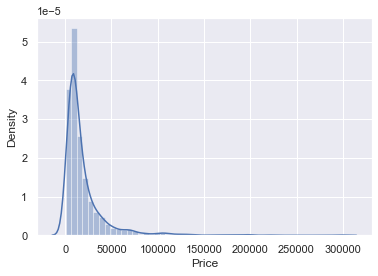

In [470]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers
This is done by dropping the values on the far right, ie the excessively high values. Since these form 99% of the highest value on the y-axis, we take only the values in the 1%

In [471]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         3984   3984.00   3984  3984.00  3984.00        3984   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           880       nan   1528      nan      nan        1853   
mean           NaN  17837.12    NaN   165.12     2.74         NaN   
std            NaN  18976.27    NaN   102.77     4.96         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6980.00    NaN    93.00     1.80         NaN   
50%            NaN  11400.00    NaN   160.00     2.20         NaN   
75%            NaN  21000.00    NaN   230.00     3.00         NaN   
max            NaN 129222.00    NaN   980.00    99.99         NaN   

       Registration    Year  
count          3984 3984.00  
unique            2     nan  
top             yes     nan  
freq           3613     nan  
mean            NaN 2006.29  
std             NaN    6.67  
min             NaN 1969.00  
25%             NaN 2002.75  
50%             NaN 2007.00  
75%             NaN 2011.00  
max             NaN 2016.00

<AxesSubplot:xlabel='Price', ylabel='Density'>

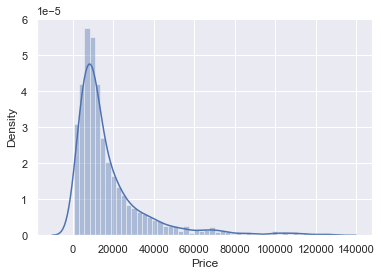

In [472]:
sns.distplot(data_1['Price'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

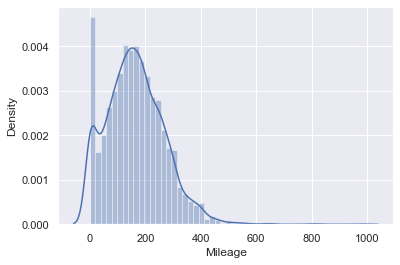

In [473]:
sns.distplot(data_no_mv['Mileage'])

In [474]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

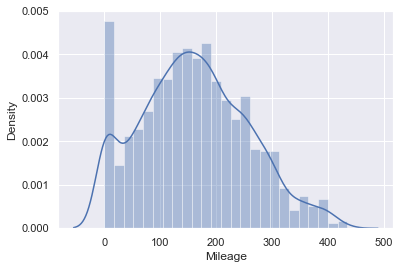

In [475]:
sns.distplot(data_2['Mileage'])

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

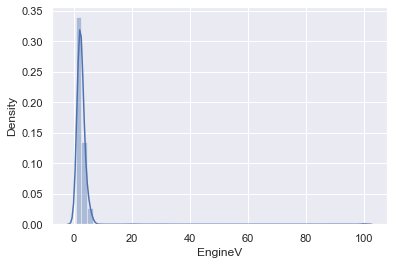

In [476]:
sns.distplot(data_no_mv['EngineV'])

In [477]:
data_3 = data_2[data_2['EngineV']<6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

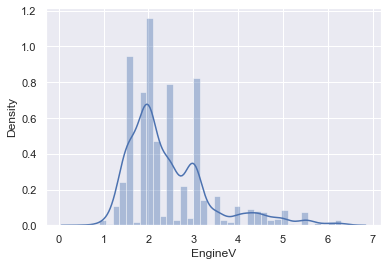

In [478]:
sns.distplot(data_3['EngineV'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

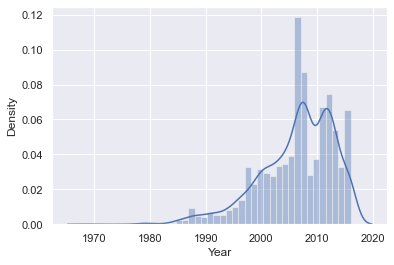

In [479]:
sns.distplot(data_no_mv['Year'])

This time we drop the values on the far left, ie the excessively low values. Since we assume that these fall in the low 1% of the lowest value on the y-axis, we take only the values in the 99%

In [480]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<AxesSubplot:xlabel='Year', ylabel='Density'>

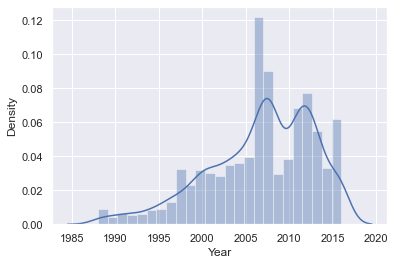

In [481]:
sns.distplot(data_4['Year'])

In [482]:
data_cleaned = data_4.reset_index(drop=True)

In [483]:
data_cleaned.describe(include='all')
data_cleaned.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW  4200.00      sedan      277     2.00      Petrol   
1  Mercedes-Benz  7900.00        van      427     2.90      Diesel   
2  Mercedes-Benz 13300.00      sedan      358     5.00         Gas   
3           Audi 23000.00  crossover      240     4.20      Petrol   
4         Toyota 18300.00  crossover      120     2.00      Petrol   

  Registration  Year  
0          yes  1991  
1          yes  1999  
2          yes  2003  
3          yes  2007  
4          yes  2011

## Checking the OLS assumptions

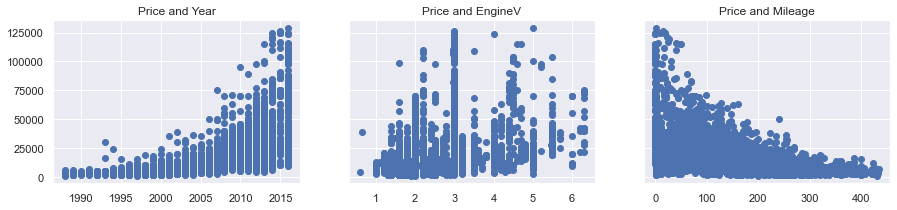

In [484]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

### Relaxing the assumptions

In [485]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW   4200.00      sedan      277     2.00      Petrol   
1     Mercedes-Benz   7900.00        van      427     2.90      Diesel   
2     Mercedes-Benz  13300.00      sedan      358     5.00         Gas   
3              Audi  23000.00  crossover      240     4.20      Petrol   
4            Toyota  18300.00  crossover      120     2.00      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen  11500.00        van      163     2.50      Diesel   
3863         Toyota  17900.00      sedan       35     1.60      Petrol   
3864  Mercedes-Benz 125000.00      sedan        9     3.00      Diesel   
3865            BMW   6500.00      sedan        1     3.50      Petrol   
3866     Volkswagen  13500.00        van      124     2.00      Diesel   

     Registration  Year  log_price  
0             yes  1991       8.34  
1             yes  1999       8.97  
2             yes  2003       9.50  
3             yes  2007      10.04  
4             yes  2011       9.81  
...           ...   ...        ...  
3862          yes  2008       9.35  
3863          yes  2014       9.79  
3864          yes  2014      11.74  
3865          yes  1999       8.78  
3866          yes  2013       9.51  

[3867 rows x 9 columns]

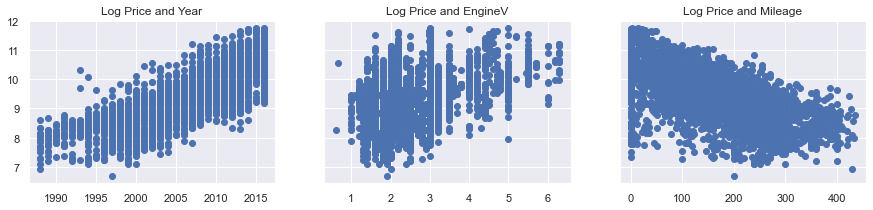

In [486]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [487]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [488]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [489]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [490]:
vif
data_cleaned.head()

Brand       Body  Mileage  EngineV Engine Type Registration  Year  \
0            BMW      sedan      277     2.00      Petrol          yes  1991   
1  Mercedes-Benz        van      427     2.90      Diesel          yes  1999   
2  Mercedes-Benz      sedan      358     5.00         Gas          yes  2003   
3           Audi  crossover      240     4.20      Petrol          yes  2007   
4         Toyota  crossover      120     2.00      Petrol          yes  2011   

   log_price  
0       8.34  
1       8.97  
2       9.50  
3      10.04  
4       9.81

## Create dummy variables

In [491]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [492]:
data_with_dummies.head()

Mileage  EngineV  Year  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277     2.00  1991       8.34          1                    0   
1      427     2.90  1999       8.97          0                    1   
2      358     5.00  2003       9.50          0                    1   
3      240     4.20  2007      10.04          0                    0   
4      120     2.00  2011       9.81          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

### Rearrange a bit

In [493]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [496]:
cols = ['log_price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [497]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage  EngineV  Year  Brand_BMW  Brand_Mercedes-Benz  \
0       8.34      277     2.00  1991          1                    0   
1       8.97      427     2.90  1999          0                    1   
2       9.50      358     5.00  2003          0                    1   
3      10.04      240     4.20  2007          0                    0   
4       9.81      120     2.00  2011          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

## Linear regression model

### Declare the inputs and the targets

In [498]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [499]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [500]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [501]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [502]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [503]:
y_hat = reg.predict(x_train)

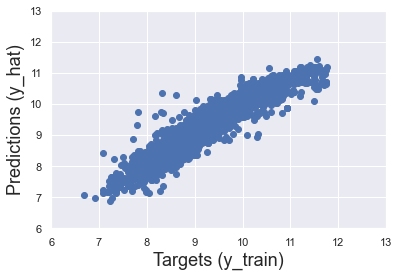

In [504]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

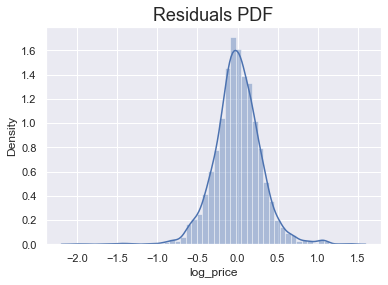

In [505]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [506]:
reg.score(x_train,y_train)

0.8849485492094937

### Finding the weights and bias

In [507]:
reg.intercept_

9.415379879770514

In [508]:
reg.coef_

array([-0.10834397,  0.21888063,  0.50702491,  0.02583093,  0.00271501,
       -0.13396361, -0.20432869, -0.07814928, -0.10319911, -0.09312869,
       -0.07587858, -0.14180638, -0.0980039 , -0.15795634, -0.04301379,
       -0.01846564, -0.06002956,  0.25497094])

In [509]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features  Weights
0               Mileage    -0.11
1               EngineV     0.22
2                  Year     0.51
3             Brand_BMW     0.03
4   Brand_Mercedes-Benz     0.00
5      Brand_Mitsubishi    -0.13
6         Brand_Renault    -0.20
7          Brand_Toyota    -0.08
8      Brand_Volkswagen    -0.10
9            Body_hatch    -0.09
10           Body_other    -0.08
11           Body_sedan    -0.14
12           Body_vagon    -0.10
13             Body_van    -0.16
14      Engine Type_Gas    -0.04
15    Engine Type_Other    -0.02
16   Engine Type_Petrol    -0.06
17     Registration_yes     0.25

In [510]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [511]:
y_hat_test = reg.predict(x_test)

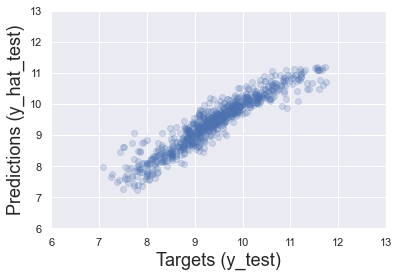

In [512]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [513]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

Prediction
0     8518.98
1     3282.27
2     1593.75
3     7141.20
4     8906.59

In [514]:
df_pf['Target'] = np.exp(y_test)
df_pf.head(100)

Prediction   Target
0      8518.98      nan
1      3282.27  7900.00
2      1593.75      nan
3      7141.20      nan
4      8906.59      nan
5     36575.55 14200.00
6     23813.12      nan
7     19791.53      nan
8     13305.07 11950.00
9     40533.94      nan
10    14466.40      nan
11     4032.81 10500.00
12     6260.36      nan
13    18152.90      nan
14     7375.80      nan
15    13052.60      nan
16    20526.82  3500.00
17    12101.46      nan
18    46310.84  7500.00
19    20683.87  6800.00
20    12485.08      nan
21    36721.59      nan
22     6448.14      nan
23    13667.97      nan
24    20413.92      nan
25    46881.10      nan
26     3411.47      nan
27     6244.96      nan
28    38145.29      nan
29    28631.29      nan
30    11486.05      nan
31    16265.63 14500.00
32    17680.07      nan
33    22269.19      nan
34    13288.09      nan
35    16644.65      nan
36    11809.66      nan
37    20256.16      nan
38    14457.37      nan
39    22915.53      nan
40    16408.39 41000.00
41    25578.07      nan
42    25641.96      nan
43    20930.49  6500.00
44    11275.12      nan
45     6783.75      nan
46     3262.29      nan
47    24877.07      nan
48    65158.78      nan
49     4847.84      nan
50     2025.30      nan
51     1948.90  8900.00
52    13604.30      nan
53    24377.18      nan
54    19736.22      nan
55    13393.27      nan
56    15435.28      nan
57    20957.68      nan
58    39397.64      nan
59     7513.16  4300.00
60    11339.42      nan
61     8519.57      nan
62    12256.70      nan
63     3727.76      nan
64    14700.57      nan
65    18094.34      nan
66     1655.17      nan
67     8500.13      nan
68     5386.62  3700.00
69     2064.10 15700.00
70    67644.95      nan
71    19294.39      nan
72    21814.12      nan
73    25093.44 13708.50
74     2659.17      nan
75     4887.90      nan
76     4374.26      nan
77     5721.37      nan
78    23322.65      nan
79    15716.88      nan
80     5937.27      nan
81     7385.46      nan
82     4802.92      nan
83     3804.91      nan
84     4459.44  4000.00
85    14885.87      nan
86    10434.40 14500.00
87     1366.56      nan
88     9066.78      nan
89    12121.47      nan
90     6537.06  6700.00
91    11959.15      nan
92     9061.25      nan
93    22335.68      nan
94     5658.23      nan
95    47216.00 13500.00
96     6053.11  6150.00
97     3257.62      nan
98     8806.23  4900.00
99    10280.84      nan

In [515]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [516]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

Prediction  Target
0     8518.98 2300.00
1     3282.27 2800.00
2     1593.75 2500.00
3     7141.20 6400.00
4     8906.59 9150.00

In [517]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [518]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

Prediction  Target  Residual  Difference%
0     8518.98 2300.00  -6218.98       270.39
1     3282.27 2800.00   -482.27        17.22
2     1593.75 2500.00    906.25        36.25
3     7141.20 6400.00   -741.20        11.58
4     8906.59 9150.00    243.41         2.66

In [519]:
df_pf.describe()

Prediction    Target  Residual  Difference%
count      774.00    774.00    774.00       774.00
mean     16678.16  18165.82   1487.66        23.30
std      14067.65  19967.86   9745.04        26.17
min       1366.56   1200.00 -23675.04         0.01
25%       6502.80   6900.00  -1749.13         7.74
50%      12357.26  11600.00     59.23        16.25
75%      21973.29  20500.00   1649.25        30.15
max      73147.95 126000.00  81495.90       270.39

In [520]:
pd.options.display.max_rows = 1000
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

15.32
582     9314.50  11000.00   1685.50        15.32
560    34546.50  40800.00   6253.50        15.33
661    11259.37  13300.00   2040.63        15.34
186    26418.12  22900.00  -3518.12        15.36
140    13861.40  12000.00  -1861.40        15.51
341    10974.48   9500.00  -1474.48        15.52
242     6335.73   7500.00   1164.27        15.52
659     4052.22   4799.00    746.78        15.56
592    32474.29  38500.00   6025.71        15.65
258    13768.98  11900.00  -1868.98        15.71
377     7323.70   8700.00   1376.30        15.82
710     2939.64   3500.00    560.36        16.01
352     3357.52   4000.00    642.48        16.06
18     46310.84  39900.00  -6410.84        16.07
474    16019.06  13800.00  -2219.06        16.08
53     24377.18  21000.00  -3377.18        16.08
764    12422.14  10700.00  -1722.14        16.09
138    10451.20   8999.00  -1452.20        16.14
102    33583.58  28900.00  -4683.58        16.21
290     2266.55   1950.00   -316.55        16.23
587    21775.04  26000.00   4224.96        16.25
653     7788.06   9300.00   1511.94        16.26
425     4183.14   4999.00    815.86        16.32
477    10356.58   8900.00  -1456.58        16.37
85     14885.87  17800.00   2914.13        16.37
326     6403.10   5500.00   -903.10        16.42
7      19791.53  16999.00  -2792.53        16.43
170    25066.48  29999.00   4932.52        16.44
156    12226.91  10500.00  -1726.91        16.45
282     3419.75   4100.00    680.25        16.59
460    50817.36  61000.00  10182.64        16.69
61      8519.57   7300.00  -1219.57        16.71
715    10038.70   8600.00  -1438.70        16.73
388    16645.98  19999.00   3353.02        16.77
521    27445.44  23500.00  -3945.44        16.79
732    14610.00  12500.00  -2110.00        16.88
346    27473.60  23500.00  -3973.60        16.91
640    11692.77  10000.00  -1692.77        16.93
309     4148.83   5000.00    851.17        17.02
625    21976.81  18777.00  -3199.81        17.04
744     2487.87   3000.00    512.13        17.07
103     3440.03   4150.00    709.97        17.11
498     9944.72  12000.00   2055.28        17.13
360     4553.68   5500.00    946.32        17.21
147     8438.88   7200.00  -1238.88        17.21
1       3282.27   2800.00   -482.27        17.22
496    17483.09  14899.00  -2584.09        17.34
314     4958.88   6000.00   1041.12        17.35
376     4954.14   6000.00   1045.86        17.43
644    55676.15  67431.00  11754.85        17.43
729     3759.31   3200.00   -559.31        17.48
288     3542.21   4300.00    757.79        17.62
695    10121.97   8600.00  -1521.97        17.70
73     25093.44  30500.00   5406.56        17.73
57     20957.68  25500.00   4542.32        17.81
430    14608.98  12400.00  -2208.98        17.81
20     12485.08  15200.00   2714.92        17.86
564    20391.53  17300.00  -3091.53        17.87
554     2748.08   3350.00    601.92        17.97
504    30387.30  25749.75  -4637.55        18.01
559    14179.10  11999.00  -2180.10        18.17
544    22485.12  27500.00   5014.88        18.24
471     4139.64   3500.00   -639.64        18.28
249    12419.63  15200.00   2780.37        18.29
48     65158.78  55000.00 -10158.78        18.47
529    51237.67  63000.00  11762.33        18.67
449     7022.50   8650.00   1627.50        18.82
479    39753.27  49000.00   9246.73        18.87
371     8088.11   6800.00  -1288.11        18.94
503     5916.58   7300.00   1383.42        18.95
207    15705.82  13200.00  -2505.82        18.98
602    15825.13  13300.00  -2525.13        18.99
518    16033.85  19800.00   3766.15        19.02
740     5058.81   6250.00   1191.19        19.06
642     7282.10   8999.00   1716.90        19.08
303    26691.65  33000.00   6308.35        19.12
531    42216.97  52300.00  10083.03        19.28
358    65360.50  80999.00  15638.50        19.31
11      4032.81   5000.00    967.19        19.34
301     8223.67  10200.00   1976.33        19.38
761     6447.92   8000.00   1552.08        19.40
628     3545.20   4400.00